# 1. Import the necessary libraries (2 marks)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(color_codes=True)
from scipy.stats import ttest_1samp, ttest_ind, levene, shapiro,chi2_contingency
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

# 2. Read the data as a data frame (2 marks)

In [2]:
df=pd.read_csv("insurance.csv")

# 3. Perform basic EDA which should include the following and print out your insights at every step. (28 marks)

# a. Shape of the data (2 marks)

In [3]:
df.shape

(1338, 7)

In [4]:
# Insight
print("Above output indicates that CSV insurance file has 1338 rows and 7 columns/variables.\n")

Above output indicates that CSV insurance file has 1338 rows and 7 columns/variables.



# b. Data type of each attribute (2 marks)

In [5]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

Below info method gives more details about data

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.2+ KB


In [7]:
# Insight
print("""Numerical variables: Age,bmi,children,charges\nCategorical variables: sex,smoker,region
Note: Since children variable here is the count of children, the categorical features of it can be utilised for analysis.""")

Numerical variables: Age,bmi,children,charges
Categorical variables: sex,smoker,region
Note: Since children variable here is the count of children, the categorical features of it can be utilised for analysis.


# c. Checking the presence of missing values (3 marks)


In [8]:
df.isna().describe()

,age,sex,bmi,children,smoker,region,charges
count,1338,1338,1338,1338,1338,1338,1338
unique,1,1,1,1,1,1,1
top,False,False,False,False,False,False,False
freq,1338,1338,1338,1338,1338,1338,1338


In [9]:
#Insights
print("Above result indicates that only one unique value for all the columns (i.e., False).\nHence no missing values in the dataset.")

Above result indicates that only one unique value for all the columns (i.e., False).
Hence no missing values in the dataset.


# d. 5 point summary of numerical attributes (3 marks)

In [10]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [11]:
# Insights
print("Variable age:\nMean[39.21] and Median[39] are almost same. This indicates that age is almost symmetrically distributed.")
print("---------------------------------------------------------------------------------------------------------------------")
print("Variable bmi:\nMean[30.66] and Median[30.4] are very close. This indicates that bmi is almost symmetrically distributed.")
print("---------------------------------------------------------------------------------------------------------------------")
print("Variable children:\nMean and Median are very close.No outliers as well(min and max are within 1.5 times IQR). This indicates that children is almost symmetrically distributed.")
print("---------------------------------------------------------------------------------------------------------------------")
print("Variable charges:\nMean > Median. There are outliers in maximum charges (max is not within 1.5 times IQR). This indicates that charges data is right skewed.")

Variable age:
Mean[39.21] and Median[39] are almost same. This indicates that age is almost symmetrically distributed.
---------------------------------------------------------------------------------------------------------------------
Variable bmi:
Mean[30.66] and Median[30.4] are very close. This indicates that bmi is almost symmetrically distributed.
---------------------------------------------------------------------------------------------------------------------
Variable children:
Mean and Median are very close.No outliers as well(min and max are within 1.5 times IQR). This indicates that children is almost symmetrically distributed.
---------------------------------------------------------------------------------------------------------------------
Variable charges:
Mean > Median. There are outliers in maximum charges (max is not within 1.5 times IQR). This indicates that charges data is right skewed.


# e. Distribution of ‘bmi’, ‘age’ and ‘charges’ columns. (4 marks)

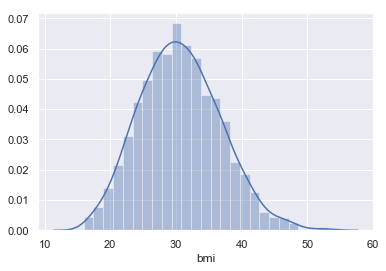

In [12]:
sns.distplot(df['bmi'])

In [13]:
#Insights
print("Above histogram indicates that bmi data is normally distributed.")

Above histogram indicates that bmi data is normally distributed.


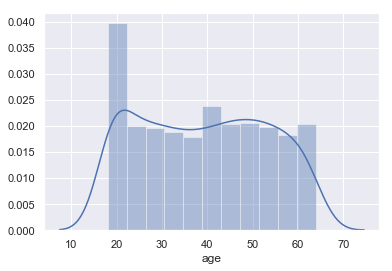

In [14]:
sns.distplot(df['age'])

In [15]:
#Insights
print("Above histogram indicates that age data is almost uniformly distributed.")

Above histogram indicates that age data is almost uniformly distributed.


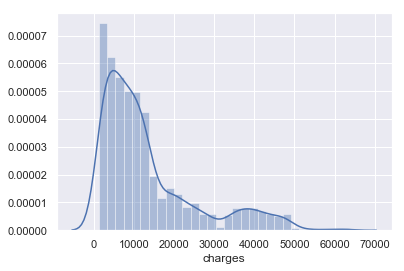

In [16]:
sns.distplot(df['charges'])

In [17]:
#Insights
print("Above histogram indicates that charges data is right skewed.")

Above histogram indicates that charges data is right skewed.


# f. Measure of skewness of ‘bmi’, ‘age’ and ‘charges’ columns (2 marks)

In [18]:
print("Skewness of bmi data:",df['bmi'].skew())
print("Skewness of age data:",df['age'].skew())
print("Skewness of charges data:",df['charges'].skew())

Skewness of bmi data: 0.2840471105987448
Skewness of age data: 0.05567251565299186
Skewness of charges data: 1.5158796580240388


In [19]:
# Insights
print("""Above results indicate that skewness is more in charges data 
and the same has been observed through distribution plot and also through 5 point summary. Charges data is right skewed.\n""")
print("""bmi data is also having bit of right skewness but its not that considerable.\n""")
print("""age data is close to perfectly symmetrical and skewness is around 5.5 percent only.""")

Above results indicate that skewness is more in charges data 
and the same has been observed through distribution plot and also through 5 point summary. Charges data is right skewed.

bmi data is also having bit of right skewness but its not that considerable.

age data is close to perfectly symmetrical and skewness is around 5.5 percent only.


# g. Checking the presence of outliers in ‘bmi’, ‘age’ and ‘charges columns 
# (4 marks)


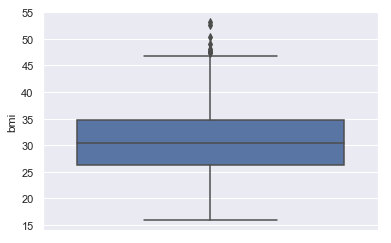

In [20]:
# Outliers can be easily identified through box plots
# Boxplot for bmi data
sns.boxplot(y=df['bmi'])


In [21]:
# Insights on bmi data
print("As per above boxplot,seems there are some outliers in bmi data and this can be double checked in below way: \n")

bmi_min=df['bmi'].min()
bmi_max=df['bmi'].max()
bmi_q1=np.quantile(df['bmi'],0.25)
bmi_q3=np.quantile(df['bmi'],0.75)
bmi_IQR=(bmi_q3-bmi_q1)
bmi_lower_whisker=bmi_q1-(bmi_IQR*1.5)
bmi_upper_whisker=bmi_q3+(bmi_IQR*1.5)

if (bmi_lower_whisker<bmi_min) and (bmi_upper_whisker>bmi_max):
    print("No outliers.")
else:
    if (bmi_upper_whisker<bmi_max):
        print("Outliers are present in maximum bmi. bmi above ",round(bmi_upper_whisker,2)," are outliers and total are ",df[df['bmi']>bmi_upper_whisker]['bmi'].count())
    if (bmi_lower_whisker>bmi_min):
        print("Outliers are present in minimum bmi. bmi above ",round(bmi_lower_whisker,2)," are outliers and total are ",df[df['bmi']<bmi_lower_whisker]['bmi'].count())
    
    

As per above boxplot,seems there are some outliers in bmi data and this can be double checked in below way: 

Outliers are present in maximum bmi. bmi above  47.29  are outliers and total are  9


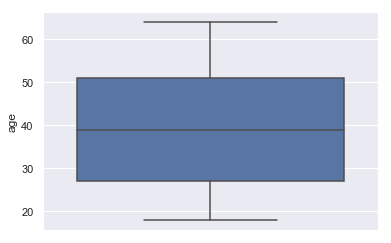

In [22]:
# Boxplot for age data
sns.boxplot(y=df['age'])

In [23]:
# Insights on age data
print("As per above boxplot,seems there are no outliers in age data and this can be double checked in below way: \n")

age_min=df['age'].min()
age_max=df['age'].max()
age_q1=np.quantile(df['age'],0.25)
age_q3=np.quantile(df['age'],0.75)
age_IQR=(age_q3-age_q1)
age_lower_whisker=age_q1-(age_IQR*1.5)
age_upper_whisker=age_q3+(age_IQR*1.5)

if (age_lower_whisker<age_min) and (age_upper_whisker>age_max):
    print("No outliers.")
else:
    if (age_upper_whisker<age_max):
        print("Outliers are present in maximum age. age above ",round(age_upper_whisker,2)," are outliers and total are ",df[df['age']>age_upper_whisker]['age'].count())
    if (age_lower_whisker>age_min):
        print("Outliers are present in minimum age. age above ",round(age_lower_whisker,2)," are outliers and total are ",df[df['age']<age_lower_whisker]['age'].count())
  

As per above boxplot,seems there are no outliers in age data and this can be double checked in below way: 

No outliers.


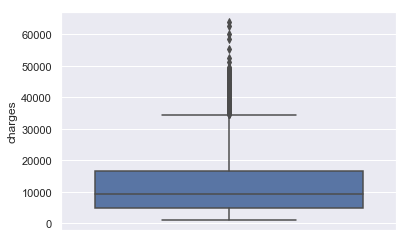

In [24]:
# Boxplot for charges data
sns.boxplot(y=df['charges'])

In [25]:
# Insights on charges data
print("As per above boxplot,seems there are many outliers in charges data and this can be double checked in below way: \n")

charges_min=df['charges'].min()
charges_max=df['charges'].max()
charges_q1=np.quantile(df['charges'],0.25)
charges_q3=np.quantile(df['charges'],0.75)
charges_IQR=(charges_q3-charges_q1)
charges_lower_whisker=charges_q1-(charges_IQR*1.5)
charges_upper_whisker=charges_q3+(charges_IQR*1.5)

if (charges_lower_whisker<charges_min) and (charges_upper_whisker>charges_max):
    print("No outliers.")
else:
    if (charges_upper_whisker<charges_max):
        print("Outliers are present in maximum charges. charges above ",round(charges_upper_whisker,2)," are outliers and total are ",df[df['charges']>charges_upper_whisker]['charges'].count())
    if (charges_lower_whisker>charges_min):
        print("Outliers are present in minimum charges. charges above ",round(charges_lower_whisker,2)," are outliers and total are ",df[df['charges']<charges_lower_whisker]['charges'].count())
  

As per above boxplot,seems there are many outliers in charges data and this can be double checked in below way: 

Outliers are present in maximum charges. charges above  34489.35  are outliers and total are  139


# h. Distribution of categorical columns (include children) (4 marks)

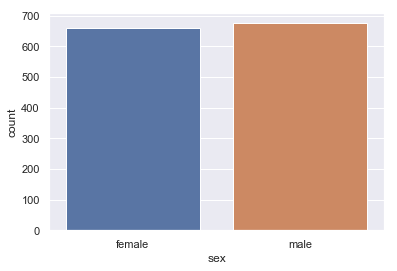

In [26]:
sns.countplot(x=df['sex'])

In [27]:
# Insights on sex variable
print("Almost male and female are in same proportion in this data. However in exact analysis, male are on bit higher side than female")

Almost male and female are in same proportion in this data. However in exact analysis, male are on bit higher side than female


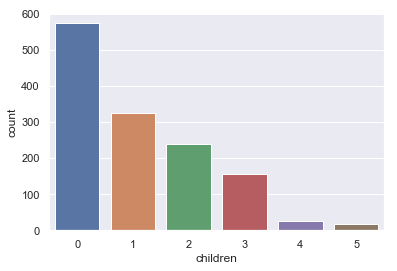

In [28]:
sns.countplot(x=df['children'])

In [29]:
# Insights on children variable
print("Distribution of children data is right skewed. As the no. of children increases the count gets reduced.")

Distribution of children data is right skewed. As the no. of children increases the count gets reduced.


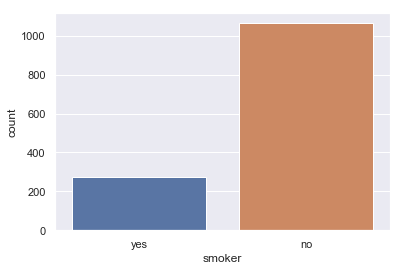

In [30]:
sns.countplot(x=df['smoker'])

In [31]:
# Insights on smoker variable
print("Non-smokers are more than smokers in this data")

Non-smokers are more than smokers in this data


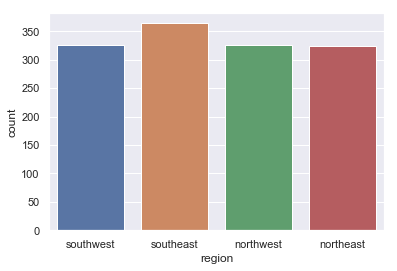

In [32]:
sns.countplot(x=df['region'])

In [33]:
# Insights on region variable
print("People are distributed across all regions almost equally. In precise southeast people are comparitively more than the other 3 regions.")

People are distributed across all regions almost equally. In precise southeast people are comparitively more than the other 3 regions.


# i. Pair plot that includes all the columns of the data frame (4 marks)


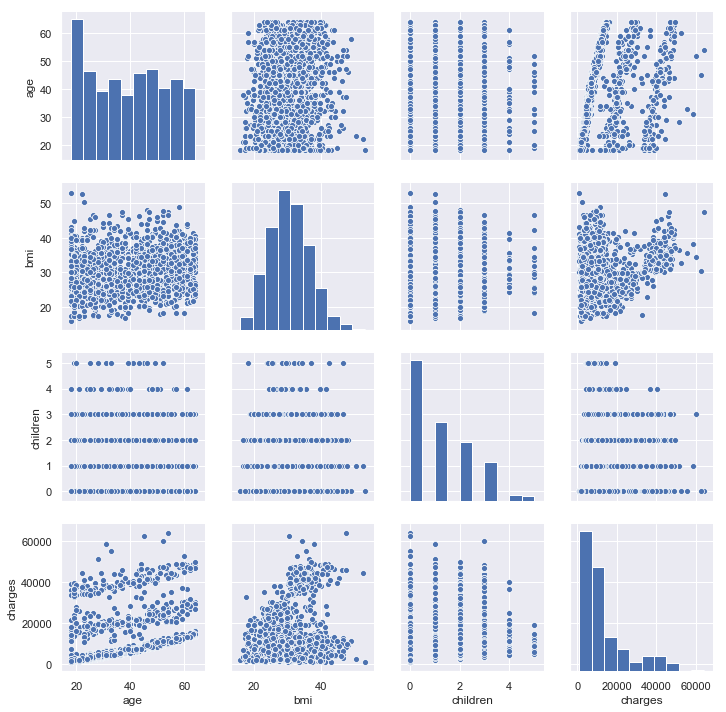

In [34]:
sns.pairplot(df)

In [35]:
# Insights 
print("Insights for,\n")
print("""bmi vs age:
Seems there is no relationship between bmi and age as the data is scattered everywhere equally.
""")
print("""age vs charges:
By looking at scatterplot, looks like there are three clusters based on charges for all age groups.
   Cluster 1: All the age group customers who has charges below 15k
   Cluster 2: Charges between 15k to 35k
   Cluster 3: Charges between 35k and above.
And also, each cluster tends to have a linear relationship between age and charges.
""")
print("""bmi vs charges:
Mostly High charges are for bmi after 30's only.
""")
print("""children vs bmi:
If groups are formed based on no. of children then the range of the bmi tends to get reduced as the no. of children increases.
For example, bmi range of children of four group is less compared to children of 3 group.
""")
print("""children vs charges:
As no. of children increased, surprisingly the charges seems to be less.
""")

Insights for,

bmi vs age:
Seems there is no relationship between bmi and age as the data is scattered everywhere equally.

age vs charges:
By looking at scatterplot, looks like there are three clusters based on charges for all age groups.
   Cluster 1: All the age group customers who has charges below 15k
   Cluster 2: Charges between 15k to 35k
   Cluster 3: Charges between 35k and above.
And also, each cluster tends to have a linear relationship between age and charges.

bmi vs charges:
Mostly High charges are for bmi after 30's only.

children vs bmi:
If groups are formed based on no. of children then the range of the bmi tends to get reduced as the no. of children increases.
For example, bmi range of children of four group is less compared to children of 3 group.

children vs charges:
As no. of children increased, surprisingly the charges seems to be less.



By looking at heatmap,as the correlation values are very less and hence there is no linear relationship between these variables.


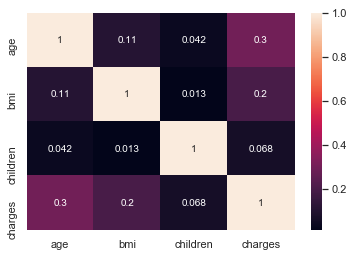

In [36]:
# Above insights can be further analysed with heatmaps
sns.heatmap(df[['age','bmi','children','charges']].corr(),annot=True)

print("""By looking at heatmap,as the correlation values are very less and hence there is no linear relationship between these variables.""")

# 4. Answer the following questions with statistical evidence (28 marks)


# a. Do charges of people who smoke differ significantly from the people who don't? (7 marks)



In [37]:
print("""This falls under C--> Q . Meaning, Explanatory is Categorical(smoker: yes or no) and response is Numerical(Charges).

This Hypothesis Testing can be done with two Independent sample t-test.""")


This falls under C--> Q . Meaning, Explanatory is Categorical(smoker: yes or no) and response is Numerical(Charges).

This Hypothesis Testing can be done with two Independent sample t-test.


In [38]:
print("""Step1: State the Hypothesis Testing::

Null Hypothesis(Ho): There is no difference in charges for smokers and non-smokers.
Alternate Hypothesis(Ha): There is difference in charges for smokers and non-smokers.

In other words,
Ho: Mean charges of smoker = Mean charges of Non-smoker (OR) μ1-μ2=0
Ha: Mean charges of smoker (is not equal to) # Mean charges of Non-smoker (OR) μ1-μ2≠0

where 'μ1' indicates Mean charges of smoker and 'μ2' indicates Mean charges of non-smoker.
""")

Step1: State the Hypothesis Testing::

Null Hypothesis(Ho): There is no difference in charges for smokers and non-smokers.
Alternate Hypothesis(Ha): There is difference in charges for smokers and non-smokers.

In other words,
Ho: Mean charges of smoker = Mean charges of Non-smoker (OR) μ1-μ2=0
Ha: Mean charges of smoker (is not equal to) # Mean charges of Non-smoker (OR) μ1-μ2≠0

where 'μ1' indicates Mean charges of smoker and 'μ2' indicates Mean charges of non-smoker.



Step2: Get the data and check whether the data meets required conditions to run the Two Independent Sample t-test::

Condition 1: Both samples should have been independent and should be a random sample.
Verification of Condition 1: Since data is collected by Great Lakes for ML program, 
we can assume data has been selected in random and two samples are picked are of independent.

Condition 2: Smoker and non-smoker population should be a normal distributed. If not, atleast the sample sizes should be large enough. 
Verification of Condition 2: Normality of the population distribution can be cross-checked with Histogram of sample. 
Normality can be tested with shapiro as well. And also we can get the sizes of both samples to see if they are larger enough.

Shapiro test result for Smoker sample: test-statistic and p-value:  0.9395521879196167 , 3.6251879276250065e-09
Shapiro test result for Non-Smoker sample: test-statistic and p-value:  0.8728628158569336 , 1.4455900162299346e-28 

Size o

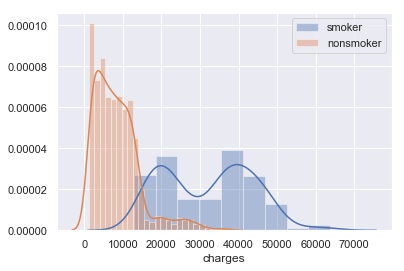

In [39]:
print("""Step2: Get the data and check whether the data meets required conditions to run the Two Independent Sample t-test::\n""")

print("""Condition 1: Both samples should have been independent and should be a random sample.
Verification of Condition 1: Since data is collected by Great Lakes for ML program, 
we can assume data has been selected in random and two samples are picked are of independent.\n""")
print("""Condition 2: Smoker and non-smoker population should be a normal distributed. If not, atleast the sample sizes should be large enough. 
Verification of Condition 2: Normality of the population distribution can be cross-checked with Histogram of sample. 
Normality can be tested with shapiro as well. And also we can get the sizes of both samples to see if they are larger enough.\n""")

df_smoker=df[df['smoker']=='yes']['charges']
df_nonsmoker=df[df['smoker']=='no']['charges']

# Distribution plots of both samples
sns.distplot(a=df_smoker, label='smoker')
sns.distplot(a=df_nonsmoker, label='nonsmoker')
plt.legend()

#Shapiro test for normality
shp_sk_t_statistic,shp_sk_p_value= shapiro(df_smoker)
shp_nsk_t_statistic,shp_nsk_p_value= shapiro(df_nonsmoker)
print("Shapiro test result for Smoker sample: test-statistic and p-value: ",shp_sk_t_statistic,",",shp_sk_p_value)
print("Shapiro test result for Non-Smoker sample: test-statistic and p-value: ",shp_nsk_t_statistic,",",shp_nsk_p_value,"\n")

# Samples size of both samples:
print("Size of smoker sample:", df_smoker.count())
print("Size of non-smoker sample:", df_nonsmoker.count())

print("\nObservation: As per Shapiro test and by samples' histogram its clear that populations are not normal. However size of each sample is large enough and hence Two Independent Sample t-test can be performed.")

In [40]:
print("Step 3: Perform the statistics")

mu1=df_smoker.mean()
mu2=df_nonsmoker.mean()
n1=df_smoker.count()
n2=df_nonsmoker.count()

var1=(df_smoker.var())/n1
var2=(df_nonsmoker.var())/n2
t=((mu1-mu2)-0)/(np.sqrt((var1+var2)))

print("Value of t: ",t)
print("Degrees of freedom: ",n1+n2-2)


Step 3: Perform the statistics
Value of t:  32.75188776634185
Degrees of freedom:  1336


In [41]:
print("""Note: Above t and p value calculation can be done easily using SciPy as below::\n""")

#Check for equal variance of the groups with - Levene test
lev_t_statistic, lev_p_value=levene(df_smoker,df_nonsmoker)

print("Levene Test Result: test-statistic and p-value: ",lev_t_statistic,",", lev_p_value)
print("""\nAbove values indicate that null hypothesis of levene test can be rejected. 
That means the variance of the two groups(Smoker & Non-smoker) are not equal.\n""")

# Since variances of both populations are not equal, passing argument equal_var=False in below function.
t_statistic, p_value=ttest_ind(df_smoker,df_nonsmoker,equal_var=False)

print("Two Independent Sample test Result:: test-statistic and p-value:%.3f,%.3f"%(t_statistic, p_value))

Note: Above t and p value calculation can be done easily using SciPy as below::

Levene Test Result: test-statistic and p-value:  332.6135162726081 , 1.5593284881803726e-66

Above values indicate that null hypothesis of levene test can be rejected. 
That means the variance of the two groups(Smoker & Non-smoker) are not equal.

Two Independent Sample test Result:: test-statistic and p-value:32.752,0.000


In [42]:
print("Step 4: Conclusion based on the statistics obtained in step 3.\n")
print("""Conclusion: 
Since the value of t is very high and p-value<0.05 ,its highly extreme[impossible] or unlikely to observe this data given Ho is true.
Hence null hypothesis can be rejected.That means charges of people who smoke differ significantly from the people who don't. """)

Step 4: Conclusion based on the statistics obtained in step 3.

Conclusion: 
Since the value of t is very high and p-value<0.05 ,its highly extreme[impossible] or unlikely to observe this data given Ho is true.
Hence null hypothesis can be rejected.That means charges of people who smoke differ significantly from the people who don't. 


# b. Does bmi of males differ significantly from that of females? (7 marks)


In [43]:
print("""This falls under C--> Q . Meaning, Explanatory is Categorical(sex: male or female) and response is Numerical(bmi).

This Hypothesis Testing can be done with two Independent sample t-test.""")


This falls under C--> Q . Meaning, Explanatory is Categorical(sex: male or female) and response is Numerical(bmi).

This Hypothesis Testing can be done with two Independent sample t-test.


In [44]:
print("""Step1: State the Hypothesis Testing::

Null Hypothesis(Ho): There is no difference in bmi of males and females.
Alternate Hypothesis(Ha): There is difference in bmi of males and females.

In other words,
Ho: Mean bmi of males = Mean bmi of females (OR) μ1-μ2=0
Ha: Mean bmi of males (is not equal to) # Mean bmi of females (OR) μ1-μ2≠0

where 'μ1' indicates Mean bmi of males and 'μ2' indicates Mean bmi of females.
""")

Step1: State the Hypothesis Testing::

Null Hypothesis(Ho): There is no difference in bmi of males and females.
Alternate Hypothesis(Ha): There is difference in bmi of males and females.

In other words,
Ho: Mean bmi of males = Mean bmi of females (OR) μ1-μ2=0
Ha: Mean bmi of males (is not equal to) # Mean bmi of females (OR) μ1-μ2≠0

where 'μ1' indicates Mean bmi of males and 'μ2' indicates Mean bmi of females.



Step2: Get the data and check whether the data meets required conditions to run the Two Independent Sample t-test::

Condition 1: Both samples should have been independent and should be a random sample.
Verification of Condition 1: Since data is collected by Great Lakes for ML program, 
we can assume data has been selected in random and two samples are picked are of independent.

Condition 2: bmi of male and female population should be normal distributed. If not, atleast the sample sizes should be large enough. ")
Verification of Condition 2: Normality of the population distribution can be cross-checked with Histogram of sample. 
Normality can be tested with shapiro as well. And also we can get the sizes of both samples to see if they are larger enough.

Shapiro test result for male sample: test-statistic and p-value:  0.9930475354194641 , 0.003130641533061862
Shapiro test result for female sample: test-statistic and p-value:  0.9930257797241211 , 0.0035433683078736067 

Size of male s

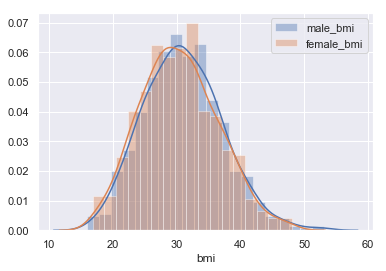

In [45]:
print("""Step2: Get the data and check whether the data meets required conditions to run the Two Independent Sample t-test::\n""")

print("""Condition 1: Both samples should have been independent and should be a random sample.
Verification of Condition 1: Since data is collected by Great Lakes for ML program, 
we can assume data has been selected in random and two samples are picked are of independent.\n""")
print("""Condition 2: bmi of male and female population should be normal distributed. If not, atleast the sample sizes should be large enough. ")
Verification of Condition 2: Normality of the population distribution can be cross-checked with Histogram of sample. 
Normality can be tested with shapiro as well. And also we can get the sizes of both samples to see if they are larger enough.\n""")

df_male_bmi=df[df['sex']=='male']['bmi']
df_female_bmi=df[df['sex']=='female']['bmi']

# Distribution plots of both samples
sns.distplot(a=df_male_bmi, label='male_bmi')
sns.distplot(a=df_female_bmi, label='female_bmi')
plt.legend()

#Shapiro test for normality
shp_ml_test_statistic,shp_ml_p_value= shapiro(df_male_bmi)
shp_fml_test_statistic,shp_fml_p_value= shapiro(df_female_bmi)
print("Shapiro test result for male sample: test-statistic and p-value: ",shp_ml_test_statistic,",",shp_ml_p_value)
print("Shapiro test result for female sample: test-statistic and p-value: ",shp_fml_test_statistic,",",shp_fml_p_value,"\n")

# Samples size of both samples:
print("Size of male sample:", df_male_bmi.count())
print("Size of female sample:", df_female_bmi.count(),"\n")

print("""Observation: Shapiro test results[Not normal] and samples' histogram[close to normal] are contradicting.
However size of each sample is large enough and hence Two Independent Sample t-test can be performed.""")

In [46]:
print("Step 3: Perform the statistics")

mu1=df_male_bmi.mean()
mu2=df_female_bmi.mean()
n1=df_male_bmi.count()
n2=df_female_bmi.count()

var1=(df_male_bmi.var())/n1
var2=(df_female_bmi.var())/n2
t=((mu1-mu2)-0)/(np.sqrt((var1+var2)))

print("Value of t: ",t)
print("Degrees of freedom: ",n1+n2-2)



Step 3: Perform the statistics
Value of t:  1.6970279331238607
Degrees of freedom:  1336


In [47]:
print("""Note: Above t and p value calculation can be done easily using SciPy as below::\n""")

#Check for equal variance of the groups with - Levene test
lev_test_statistic, lev_p_value=levene(df_male_bmi,df_female_bmi)

print("Levene Test Result: test-statistic and p-value: ",lev_test_statistic,",", lev_p_value)
print("""\nAbove values indicate that null hypothesis of levene test can not be rejected. 
That means that the levene' null hypothesis stands True and hence variance of the bmi for two groups(male & female) are assumed to be equal.\n""")

# Since variances of both populations are equal, passing argument equal_var=True(default) in below function.
bmi_t_statistic, bmi_p_value=ttest_ind(df_male_bmi,df_female_bmi,equal_var=True)

print("Two Independent Sample test Result:: test-statistic and p-value:%.3f,%.3f"%(bmi_t_statistic, bmi_p_value))

Note: Above t and p value calculation can be done easily using SciPy as below::

Levene Test Result: test-statistic and p-value:  0.0039394029791134 , 0.949963293424026

Above values indicate that null hypothesis of levene test can not be rejected. 
That means that the levene' null hypothesis stands True and hence variance of the bmi for two groups(male & female) are assumed to be equal.

Two Independent Sample test Result:: test-statistic and p-value:1.697,0.090


In [48]:
print("Step 4: Conclusion based on the statistics obtained in step 3.\n")
print("""Conclusion: 
Since the p-value>0.05 , there is no enough evidence to reject the null hypothesis.
Hence we failed to reject the null hypothesis. That means statement "bmi of males is same as that of females" stands True as of now. """)


Step 4: Conclusion based on the statistics obtained in step 3.

Conclusion: 
Since the p-value>0.05 , there is no enough evidence to reject the null hypothesis.
Hence we failed to reject the null hypothesis. That means statement "bmi of males is same as that of females" stands True as of now. 


# c. Is the proportion of smokers significantly different in different genders?        (7 marks)


In [49]:
print("""This falls under C-->C. Meaning, Explanatory is Categorical(sex: male or female) and response is Categorical(smoker: yes or no).

This Hypothesis Testing can be done with chi-square independence test.""")

This falls under C-->C. Meaning, Explanatory is Categorical(sex: male or female) and response is Categorical(smoker: yes or no).

This Hypothesis Testing can be done with chi-square independence test.


In [50]:
print("""Step1: State the Hypothesis Testing::

Null Hypothesis(Ho): Proportion of smokers and non-smokers is same across genders.
Alternate Hypothesis(Ha): There is difference in proportion of smokers and non-smokers across genders.

In other words,
Ho: Proportion of smokers in males = Proportion of smokers in females 
Ha: Proportion of smokers in males (is not equal to) #Proportion of smokers in females

""")

Step1: State the Hypothesis Testing::

Null Hypothesis(Ho): Proportion of smokers and non-smokers is same across genders.
Alternate Hypothesis(Ha): There is difference in proportion of smokers and non-smokers across genders.

In other words,
Ho: Proportion of smokers in males = Proportion of smokers in females 
Ha: Proportion of smokers in males (is not equal to) #Proportion of smokers in females




In [51]:
print("""Step2: Get the data and check whether the data meets required conditions to run the Chi-square Independence test::\n""")

print("Condition 1: Both samples should have been independent and should be a random sample.")
print("Verification of Condition 1: Since data is collected by Great Lakes for ML program, we can assume data has been selected in random and two samples are picked are of independent.\n")
print("Condition 2: The sample sizes of each group should be large enough(>5). ")
print("""Verification of Condition 2: we can get the sizes of all the groups of samples to see if they are larger enough.\n""")

# Contingency table between 'sex' and 'smoker' variables
dfp=df.pivot_table( index='sex',columns='smoker',values='age',aggfunc=len)
print(dfp,"\n")
print("Observation: As per above table, sizes of the groups of sample are greater than 5 and Hence Chi-square test of Independence can be performed.")


Step2: Get the data and check whether the data meets required conditions to run the Chi-square Independence test::

Condition 1: Both samples should have been independent and should be a random sample.
Verification of Condition 1: Since data is collected by Great Lakes for ML program, we can assume data has been selected in random and two samples are picked are of independent.

Condition 2: The sample sizes of each group should be large enough(>5). 
Verification of Condition 2: we can get the sizes of all the groups of samples to see if they are larger enough.

smoker   no  yes
sex             
female  547  115
male    517  159 

Observation: As per above table, sizes of the groups of sample are greater than 5 and Hence Chi-square test of Independence can be performed.


In [52]:
print("Step 3: Perform the statistics")

chi_sq_Stat, p_value, deg_freedom, exp_freq = chi2_contingency(dfp)

print('Chi-square statistic: %3.5f , P-value: %1.6f, Degrees of freedom: %d' %(chi_sq_Stat, p_value,deg_freedom))

Step 3: Perform the statistics
Chi-square statistic: 7.39291 , P-value: 0.006548, Degrees of freedom: 1


In [53]:
print("Step 4: Conclusion based on the statistics obtained in step 3.\n")
print("""Conclusion: 
Since p-value<0.05 , its highly extreme or unlikely to observe this data given Ho is true.
Hence null hypothesis can be rejected. That means proportion of smokers significantly different in different genders. """)


Step 4: Conclusion based on the statistics obtained in step 3.

Conclusion: 
Since p-value<0.05 , its highly extreme or unlikely to observe this data given Ho is true.
Hence null hypothesis can be rejected. That means proportion of smokers significantly different in different genders. 


# d. Is the distribution of bmi across women with no children, one child and two children, the same? (7 marks)

In [54]:
print("""This falls under C-->Q. Meaning, Explanatory is Categorical(children:0,1,2) and response is Numerical (bmi).

This Hypothesis Testing can be done with one way ANOVA test.""")

This falls under C-->Q. Meaning, Explanatory is Categorical(children:0,1,2) and response is Numerical (bmi).

This Hypothesis Testing can be done with one way ANOVA test.


In [55]:
print("""Step1: State the Hypothesis Testing::

Null Hypothesis(Ho): There is no difference in distribution of bmi across women with no children, one child and two children.
Alternate Hypothesis(Ha): There is difference in distribution of bmi across women with no children, one child and two children.

In other words,
Ho: Mean bmi of women with no children = Mean bmi of women with one children = Mean bmi of women with two children (OR) μ1=μ2=μ3
Ha: Not all the means of the groups are equal

where 'μ1' indicates Mean bmi of women with no children
and 'μ2' indicates Mean bmi of women with one children
and 'μ3' indicates Mean bmi of women with two children.
""")

Step1: State the Hypothesis Testing::

Null Hypothesis(Ho): There is no difference in distribution of bmi across women with no children, one child and two children.
Alternate Hypothesis(Ha): There is difference in distribution of bmi across women with no children, one child and two children.

In other words,
Ho: Mean bmi of women with no children = Mean bmi of women with one children = Mean bmi of women with two children (OR) μ1=μ2=μ3
Ha: Not all the means of the groups are equal

where 'μ1' indicates Mean bmi of women with no children
and 'μ2' indicates Mean bmi of women with one children
and 'μ3' indicates Mean bmi of women with two children.



Step2: Get the data and check whether the data meets required conditions to run the one way ANOVA test::

Condition 1: All samples of each group should have been independent and should be a random sample.
Verification of Condition 1: Since data is collected by Great Lakes for ML program, we can assume data has been selected 
in random and samples picked for each group are of independent.

Condition 2: bmi of three groups(children: 0,1,2) should be normally distributed without extreme skewness and outliers.
If not, atleast the sample sizes of each group should be large enough.
Verification of Condition 2: Normality of the population distribution can be cross-checked with Histogram of sample. 
Normality can be tested with shapiro as well. And also we can get the sizes of both samples to see if they are larger enough.

Shapiro test result for children zero sample: test-statistic and p-value:  0.9933362007141113 , 0.012109939940273762
Shapiro test result for children one sample: test-stati

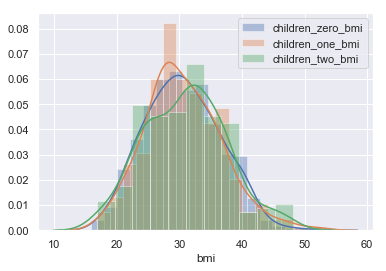

In [56]:
print("""Step2: Get the data and check whether the data meets required conditions to run the one way ANOVA test::\n""")

print("""Condition 1: All samples of each group should have been independent and should be a random sample.
Verification of Condition 1: Since data is collected by Great Lakes for ML program, we can assume data has been selected 
in random and samples picked for each group are of independent.\n""")
print("""Condition 2: bmi of three groups(children: 0,1,2) should be normally distributed without extreme skewness and outliers.
If not, atleast the sample sizes of each group should be large enough.
Verification of Condition 2: Normality of the population distribution can be cross-checked with Histogram of sample. 
Normality can be tested with shapiro as well. And also we can get the sizes of both samples to see if they are larger enough.\n""")

df_children_zero_bmi=df[df['children']==0]['bmi']
df_children_one_bmi=df[df['children']==1]['bmi']
df_children_two_bmi=df[df['children']==2]['bmi']

# Distribution plots of group samples.
sns.distplot(a=df_children_zero_bmi, label='children_zero_bmi')
sns.distplot(a=df_children_one_bmi, label='children_one_bmi')
sns.distplot(a=df_children_two_bmi, label='children_two_bmi')
plt.legend()

#Shapiro test for normality
shp_chd_zero_test_statistic,shp_chd_zero_p_value= shapiro(df_children_zero_bmi)
shp_chd_one_test_statistic,shp_chd_one_p_value= shapiro(df_children_one_bmi)
shp_chd_two_test_statistic,shp_chd_two_p_value= shapiro(df_children_two_bmi)
print("Shapiro test result for children zero sample: test-statistic and p-value: ",shp_chd_zero_test_statistic,",",shp_chd_zero_p_value)
print("Shapiro test result for children one sample: test-statistic and p-value: ",shp_chd_one_test_statistic,",",shp_chd_one_p_value)
print("Shapiro test result for children two sample: test-statistic and p-value: ",shp_chd_two_test_statistic,",",shp_chd_two_p_value,"\n")

# Sample size of three groups:
print("Size of children zero sample:", df_children_zero_bmi.count())
print("Size of children one sample:", df_children_one_bmi.count())
print("Size of children two sample:", df_children_two_bmi.count(),"\n")

print("""Observation for condition 2: Shapiro test results[only children 2 is normal] and samples' histogram[approx. normal] are contradicting.
However size of each sample is large enough and hence one way ANOVA test can be performed.\n""")
print("""Condition 3: Population of all the groups should have same standard deviation. 
This can be verified with sample standard deviations and if the ratio of max std to min std is less than 2 then 
standard deviations of all the populations can be assumed to be same.
Verification of Condition 3: Below results show that standard deviations of the samples are close and hence same can be assumed for populations.
Also box-plot helps in understanding the distribution of the data.\n""")


# Standard deviations
std_bmi_zero_children=df_children_zero_bmi.std()
std_bmi_one_children=df_children_one_bmi.std()
std_bmi_two_children=df_children_two_bmi.std()
print("Std deviations for Children(0,1,2) respectively:%.3f,%.3f,%.3f" %(std_bmi_zero_children,std_bmi_one_children,std_bmi_two_children))

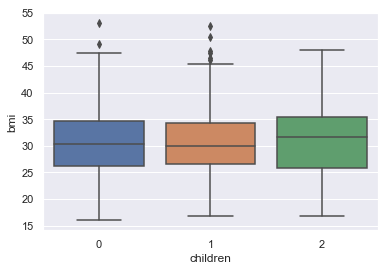

In [57]:
# Selecting only children 0,1,2 data from entire dataset.
df_required=df[df['children']<3][['children','bmi']]

# box plots to visualize the distribution
sns.boxplot(x=df_required['children'],y=df['bmi'])

In [58]:
print("Step 3: Perform the statistics")

model=ols(formula='bmi ~ C(children)',data=df_required).fit()
aov_table=anova_lm(model,typ=1)

print(aov_table)

Step 3: Perform the statistics
                 df        sum_sq    mean_sq         F    PR(>F)
C(children)     2.0     31.631915  15.815957  0.416983  0.659133
Residual     1135.0  43049.991501  37.929508       NaN       NaN


In [59]:
print("Step 4: Conclusion based on the statistics obtained in step 3.\n")
print("""Conclusion: 
Since p-value>0.05 , its very much likely to observe this data given Ho is true.
Hence we failed to reject the null hypothesis. That means statement ,
"There is no difference in distribution of bmi across women with no children,one child and two children" stands True as of now.""")


Step 4: Conclusion based on the statistics obtained in step 3.

Conclusion: 
Since p-value>0.05 , its very much likely to observe this data given Ho is true.
Hence we failed to reject the null hypothesis. That means statement ,
"There is no difference in distribution of bmi across women with no children,one child and two children" stands True as of now.
